In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## データの読み込み

In [4]:
X_train = pd.read_csv('data/X_train.csv')
y_train = pd.read_csv('data/y_train.csv')
X_test  = pd.read_csv('data/X_test.csv')

X_train.shape, y_train.shape, X_test.shape

((891, 7), (891, 1), (418, 7))

## モデル生成
- パイプラインとGridSearchで良いパラメータを探す

In [5]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

In [6]:
# パイプライン
estimator = [('scaler', MinMaxScaler()),
             ('clf', SVC())]

pipe = Pipeline(estimator)

# Grid Search
C_range = 10**np.arange(-3.0, 6.0)
param = {'clf__C': C_range,
         'clf__kernel': ['rbf']}

gs = GridSearchCV(pipe, param, n_jobs=-1, verbose=10)

In [7]:
gs.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1834s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  38 out of  45 | elapsed:    7.0s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  43 out of  45 | elapsed:   23.6s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   31.9s finished
/Users/tontech/opt/anaconda3/envs/ML-discrimination/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=Tr

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        MinMaxScaler(copy=True,
                                                     feature_range=(0, 1))),
                                       ('clf',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0.001, verbose=False))],
                                verbose=False

In [8]:
gs.best_params_, gs.best_score_, gs.best_estimator_

({'clf__C': 1.0, 'clf__kernel': 'rbf'},
 0.813684012303057,
 Pipeline(memory=None,
          steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                 ('clf',
                  SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                      coef0=0.0, decision_function_shape='ovr', degree=3,
                      gamma='scale', kernel='rbf', max_iter=-1,
                      probability=False, random_state=None, shrinking=True,
                      tol=0.001, verbose=False))],
          verbose=False))

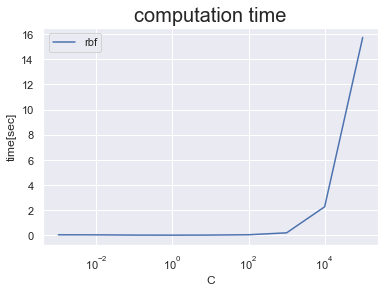

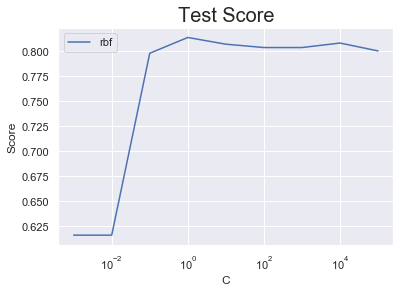

In [9]:
res = gs.cv_results_

# 処理時間のプロット
s_rbf = (res['param_clf__kernel'] == 'rbf')
plt.plot(C_range, res['mean_fit_time'][s_rbf], label='rbf')

# s_linear = (res['param_clf__kernel'] == 'linear')
# plt.plot(C_range, res['mean_fit_time'][s_linear], label='linear')

plt.xscale('log')
plt.xlabel('C', fontsize=12)
plt.ylabel('time[sec]', fontsize=12)
plt.title('computation time', fontsize=20)
plt.legend()
plt.show()

# 精度のプロット
plt.plot(C_range, res['mean_test_score'][s_rbf], label='rbf')
# plt.plot(C_range, res['mean_test_score'][s_linear], label='linear')

plt.legend()
plt.xscale('log')
plt.xlabel('C', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('Test Score', fontsize=20)
plt.show()

## モデルの保存・ロード
- [参考Web](https://localab.jp/blog/save-and-load-machine-learning-models-in-python-with-scikit-learn/)

In [10]:
# import pickle
# fname = 'output/gs_trained_titanic_test.sav'

# pickle.dump(gs, open(fname, 'wb'))
# gs = pickle.load(open(fname, 'rb'))

## 予測の作成

In [11]:
y_pred = gs.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [14]:
gender_submission = pd.read_csv('input/gender_submission.csv')
df_result = gender_submission.copy()
df_result['Survived'] = y_pred.astype(int)
df_result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [15]:
# 予測の保存
df_result.to_csv('output/submission.csv', index=False)